<a href="https://colab.research.google.com/github/Giancarix117/Assignment6/blob/main/Cookies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability & Statistics** - Graded Assignment
*Submission deadline:  Sunday, January 29, 23:59 Barcelona time*

You can ask me for feedback / advice up till January 27, 16:59 Barcelona time.

## **Task 1 *(5 points)*** - Exploratory data analysis

In this section, you will get to know the data you are working with.

First, describe the dataset in a couple of sentences. Mention what it's about, which information is available in it, etc.






This dataset includes the results from an A/B test examining the effects of moving the first gate in the game Cookie Cats from level 30 to level 40. It contains data from 90,189 players who were randomly assigned to either the control group with a gate at level 30 or the group with a gate at level 40. The variables in the dataset include userid, version, sum_gamerounds, retention_1 and retention_7, which measure the number of game rounds played during the first 14 days after install and if the player returned one and seven days after install, respectively.

Now, highlight at least three interesting things one can learn from the dataset. Make some plots, summary tables, etc., and always include an explanation of what you see in plain English. Make it a short data story that is interesting to read!

You can use our *Titanic* and *Mammals* notebooks as an inspiration.

116


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url="https://raw.githubusercontent.com/Giancarix117/Assignment6/main/cookie_cats.csv"
data = pd.read_csv(url)
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


First, we will take a look at the retention rates between both versions. 

In [21]:
#print(data['id'].loc[data.index[0]])
version30_r1=[]
for i in range(90188):
  if data['retention_1'].loc[data.index[i]]== True and data["version"].loc[data.index[i]]=="gate_30": #this will gather all the players in version 30 who came back after a day
    version30_r1.append(1)
  if data['retention_1'].loc[data.index[i]]== False and data["version"].loc[data.index[i]]=="gate_30": #this will gather all the players in version 30 who decided never to come back
    version30_r1.append(0)


44700


Great! So now we have a list with all the players from version 30 who came back after a day. Lets go ahead and make the same type of list for version 40.


In [5]:
version40_r1=[]
for i in range(90188):
  if data['retention_1'].loc[data.index[i]]== True and data["version"].loc[data.index[i]]=="gate_40": #this will gather all the players in version 40 who came back after a day
    version40_r1.append(1)
  if data['retention_1'].loc[data.index[i]]== False and data["version"].loc[data.index[i]]=="gate_40": #this will gather all the players in version 40 who decided never to come back
    version40_r1.append(0)

Beautiful, simply beautiful! Now lets go ahead and do the same for players who came back after 7 days!

In [6]:
version30_r7=[]
for i in range(90188):
  if data['retention_7'].loc[data.index[i]]== True and data["version"].loc[data.index[i]]=="gate_30": 
    version30_r7.append(1)
  if data['retention_7'].loc[data.index[i]]== False and data["version"].loc[data.index[i]]=="gate_30": 
    version30_r7.append(0)

And for version 40

In [8]:
version40_r7=[]
for i in range(90188):
  if data['retention_7'].loc[data.index[i]]== True and data["version"].loc[data.index[i]]=="gate_40": #this will gather all the players in version 30 who came back after a day
    version40_r7.append(1)
  if data['retention_7'].loc[data.index[i]]== False and data["version"].loc[data.index[i]]=="gate_40": #this will gather all the players in version 30 who decided never to come back
    version40_r7.append(0)

Now for the good part! Lets look at some graphs! To start things off, lets  compare the number of players who came back in version 30 after 1 day.

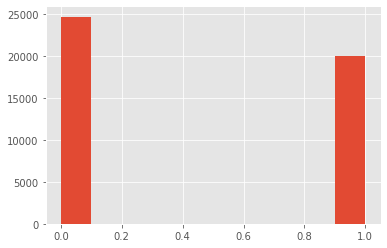

In [23]:

plt.hist(version30_r1, bins=10)
plt.style.use('ggplot')
plt.show()

In [25]:
def percentage(part, whole):
  return 100 * float(part)/float(whole)

Hmmm seems like only about half of the players came back. Lets look at the raw numbers shall we?

In [30]:
v30yes1=0
v30no1=0
for i in version30_r1:
  if i==1:
    v30yes1+=1
  elif i==0:
    v30no1+=1
print(str(v30yes1) + " players came back the next day, while "+str(v30no1)+" never came back :(")
print("the percentage of players who came back is "+ str(percentage(v30yes1,len(version30_r1)))+"%")


20034 players came back the next day, while 24666 never came back :(
the percentage of players who came back is 44.81879194630873%


It seems that for version 30, only around 45% of the players came back after a day! Lets take a look at version 40 then shall we?

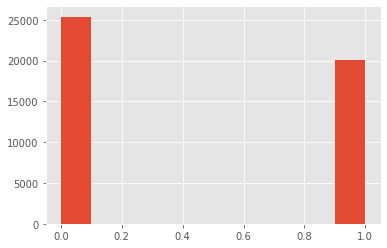

In [20]:
plt.hist(version40_r1, bins=10)
plt.style.use('ggplot')
plt.show()

In [31]:
v40yes1=0
v40no1=0
for i in version40_r1:
  if i==1:
    v40yes1+=1
  else:
    v40no1+=1
print(str(v40yes1) + " players came back the next day, while "+str(v40no1)+" never came back :(")
print("the percentage of players who came back is "+ str(percentage(v40yes1,len(version40_r1)))+"%")

20119 players came back the next day, while 25369 never came back :(
the percentage of players who came back is 44.22924727400633%


Well it seems like the numbers for players returning to version 30 and 40 after a day is pretty much the same! So lets go ahead and take a look at the numbers after 7 days, im sure this time we will find something very interesting!

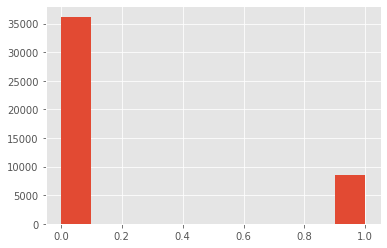

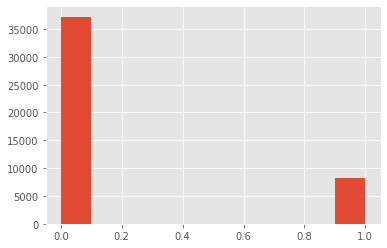

In [32]:
plt.hist(version30_r7, bins=10)
plt.style.use('ggplot')
plt.show()
plt.hist(version40_r7, bins=10)
plt.style.use('ggplot')
plt.show()

Well its hard to tell exact numbers with these plots, so lets look at hard numbers again.

In [34]:
v30yes7=0
v30no7=0
for i in version30_r7:
  if i==1:
    v30yes7+=1
  else:
    v30no7+=1
print(str(v30yes7) + " players came back the next day, while "+str(v30no7)+" never came back :(")
print("the percentage of players who came back is "+ str(percentage(v30yes7,len(version30_r7)))+"%")

8502 players came back the next day, while 36198 never came back :(
the percentage of players who came back is 19.02013422818792%


In [33]:
v40yes7=0
v40no7=0
for i in version40_r7:
  if i==1:
    v40yes7+=1
  else:
    v40no7+=1
print(str(v40yes7) + " players came back the next day, while "+str(v40no7)+" never came back :(")
print("the percentage of players who came back is "+ str(percentage(v40yes7,len(version40_r7)))+"%")

8279 players came back the next day, while 37209 never came back :(
the percentage of players who came back is 18.200404502286318%


Well this is a rather dissapointing outcome. It appears that the version difference lowered the percentage of returning players by .82%, which equals to 223 players. Lets have a better look at the numbers.

In [36]:
data.groupby('version')['retention_7'].sum()

version
gate_30    8502
gate_40    8279
Name: retention_7, dtype: int64

But we aren´t done yet! We have one more thing to look at. Did the version difference influence the amount of rounds played by each player? Lets take a look!

In [37]:
data.groupby('version')['sum_gamerounds'].sum()

version
gate_30    2344795
gate_40    2333530
Name: sum_gamerounds, dtype: int64

So it seems like version 30 players played 11,265 games more than version 40.
Lets summarize everything we learned and make it look nice and tidy!

In [40]:
df_retention_ab = data.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.448188,0.190201,2344795
gate_40,45489,0.442283,0.182000,2333530


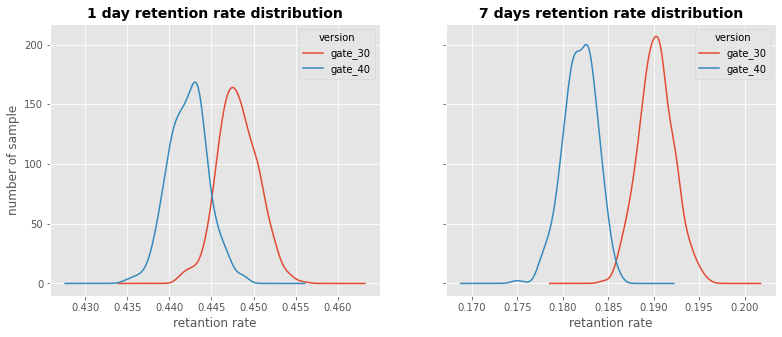

## **Task 2 *(2.5 points)*** - Maximum Likelihood Estimation

In class, we've discussed the Method of Maximum Likelihood, a widely-used technique for parameter estimation from data. We have also derived MLE for the parameters of standard discrete and continuous distribution.

Can you assume that one of the variables present in your dataset follows some known distribution? 

Formulate the assumption and obtain the maximul likelihood estimate for the parameter(s) of the distribution.

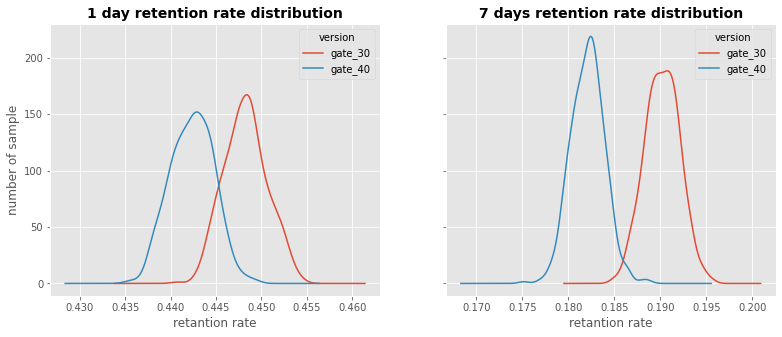

In [42]:
import dataclasses
boot_1d = []
boot_7d = []
for i in range(500):
    boot_mean_1 = data.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = data.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)


fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retantion rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold",size=14)

boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retantion rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=14)
plt.show()

## **Task 3 *(2.5 points)*** - Confidence intervals

In the previoud task, you have obtain a point estimate of the true value of some parameter. Now, construct a confidence interval.

Clearly state your assumptions, the interval you obtain and how you can interpret it.

In [ ]:
# TODO your code here

## **Task 4 *(5 points)*** - Hypothesis testing

Formulate 1-2 (if done in a couple: 3-4) hypotheses and test it Based on the available data. 

For every hypothesis, clearly state:
1. the hypothesis that is being tested in plain English  
2. $H_0$ and $H_1$
3. which statistical test you've chosen
4. why is the test applicable (what are the assumptions of the test? are they satisfied?)
5. how do you interpret the outcome of the test





In [ ]:
# TODO your code here